In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [ ]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.drop( "User ID",axis=1,inplace =True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
df["Gender"]=df["Gender"].map({"Male":0,"Female":1})
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [ ]:
x=df.iloc[:,:3]
x

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [ ]:
y=df["Purchased"]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((320, 3), (320,), (80, 3), (80,))

**Feature Scaling**

In [ ]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
x2=standardisation.fit_transform(x)

**Fitting Random Forest to the Training set**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

#for i in range(2,7):
rfe = RFE(estimator=RandomForestClassifier(), verbose=0)
rfe.fit(x_train,y_train)
print(f"Accuracy with Feature {i} ==>",metrics.accuracy_score(y_test, rfe.predict(x_test)))

Accuracy with Feature 6 ==> 0.7625


**Predicting the Test set results**

In [ ]:
y_predict_en = rfe.predict(x_test)
y_predict_en

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_en)

0.7625

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm = confusion_matrix(y_test,y_predict_en)
cm

array([[37, 11],
       [ 8, 24]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_en))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80        48
           1       0.69      0.75      0.72        32

    accuracy                           0.76        80
   macro avg       0.75      0.76      0.76        80
weighted avg       0.77      0.76      0.76        80



**Visualising the Training set results**

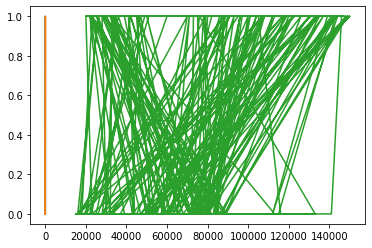

In [ ]:
import matplotlib.pyplot as plt  
plt.plot(x_train,y_train)
plt.show()

**Visualising the Test set results**

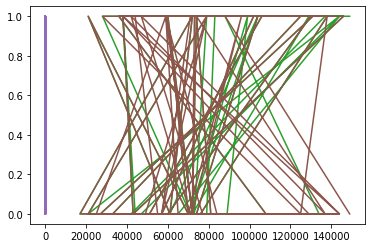

In [ ]:
import matplotlib.pyplot as plt  
plt.plot(x_test,y_test)
plt.plot(x_test,y_predict_en)
plt.show()